(3site-cycle-nb)=
# 1D cycle of 1D tight-binding model

In [1]:
from pythtb import TBModel, WFArray, Mesh
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def set_model(t, delta, lmbd):
    lat = [[1]]
    orb = [[0], [1/3], [2/3]]
    model = TBModel(1, 1, lat, orb)
    model.set_hop(t, 0, 1, [0])
    model.set_hop(t, 1, 2, [0])
    model.set_hop(t, 2, 0, [1])
    onsite_0 = delta * -np.cos(2*np.pi * (lmbd - 0/3))
    onsite_1 = delta * -np.cos(2*np.pi * (lmbd - 1/3))
    onsite_2 = delta * -np.cos(2*np.pi * (lmbd - 2/3))
    model.set_onsite([onsite_0, onsite_1, onsite_2])
    return model 

In [3]:
# set model parameters
delta = 2.0
t = -1.0

In [5]:
mesh = Mesh(
    dim_k=1, dim_param=1, axis_types=["k", "param"], axis_names=["kx", "lmbd"]
    )
mesh.build_full_grid(shape=(31, 21), gamma_centered=True)

Evolve tight-binding parameters along some path by performing a change of onsite terms

Two-dimensional `WFArray` in which we will store wavefunctions for all k-points and all values of $\lambda$.  

:::{note}
The index order `[k,lambda]` is important for interpreting the sign.
:::

In [6]:
# Used for initializing the Mesh
ref_model = set_model(0,0,0)

wf_kpt_lambda = WFArray(ref_model, mesh)

Populate the `WFArray` with wavefunctions for all k-points and all values of $\lambda$.

:::{note}
`solve_mesh` imposes periodic boundary conditions along periodic k-space direction so that $|\psi_{n,k}\rangle$ at $k=0$ and $k=1$ have the same phase.
:::

In [7]:
wf_kpt_lambda.solve_mesh(set_model, {"t": t, "delta": delta})

Auto-imposing PBC in mesh direction 0 for k-component 0


Compute Berry phase along k-direction for each $\lambda$

In [8]:
phase = wf_kpt_lambda.berry_phase([0], 0)

Wannier center in reduced coordinates

In [9]:
wann_center = phase / (2*np.pi)

Chern number of bottom band

In [10]:
chern = wf_kpt_lambda.chern_num(state_idx=[0], plane=(0,1))
print("Chern number in k-lambda space: ", chern)

Chern number in k-lambda space:  -1.0


Plot the position of Wannier function for bottom band

In [11]:
all_lambda = mesh.get_param_points()[:, 0]
k_dist = mesh.get_k_points()[:, 0]
eval_lam = wf_kpt_lambda.energies

(0.0, 1.0)

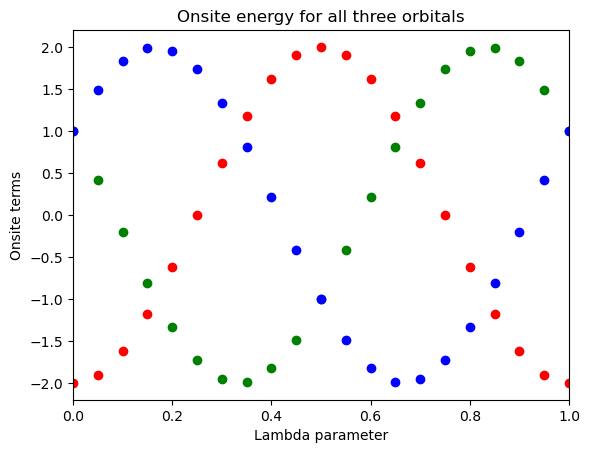

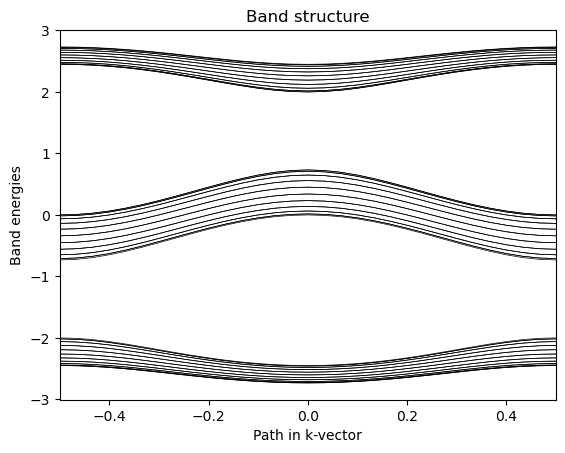

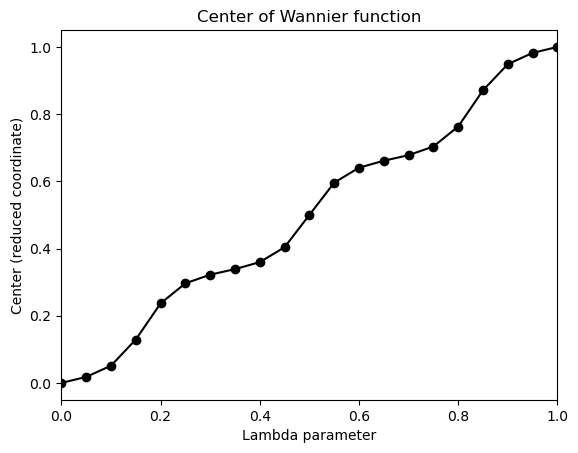

In [12]:
fig_onsite, ax_onsite = plt.subplots()
fig_band, ax_band = plt.subplots()
fig_wann, ax_wann = plt.subplots()

# plot on-site terms
ax_onsite.scatter(all_lambda, delta * -np.cos(2 * np.pi * (all_lambda - 0 / 3)), c="r")
ax_onsite.scatter(all_lambda, delta * -np.cos(2 * np.pi * (all_lambda - 1 / 3)), c="g")
ax_onsite.scatter(all_lambda, delta * -np.cos(2 * np.pi * (all_lambda - 2 / 3)), c="b")

for i_lambda in range(len(all_lambda)):
    # plot band structure for all three bands
    ax_band.plot(k_dist, eval_lam[:, i_lambda], "k-", linewidth=0.5)

# Wannier centers
ax_wann.plot(all_lambda, wann_center, "ko-")

# finish plot of onsite terms
ax_onsite.set_title("Onsite energy for all three orbitals")
ax_onsite.set_xlabel("Lambda parameter")
ax_onsite.set_ylabel("Onsite terms")
ax_onsite.set_xlim(0, 1)

# finish plot for band structure
ax_band.set_title("Band structure")
ax_band.set_xlabel("Path in k-vector")
ax_band.set_ylabel("Band energies")
ax_band.set_xlim(k_dist[0], k_dist[-1])

# finish plot for Wannier center
ax_wann.set_title("Center of Wannier function")
ax_wann.set_xlabel("Lambda parameter")
ax_wann.set_ylabel("Center (reduced coordinate)")
ax_wann.set_xlim(0, 1)
